In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 颜色空间转换

In [3]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

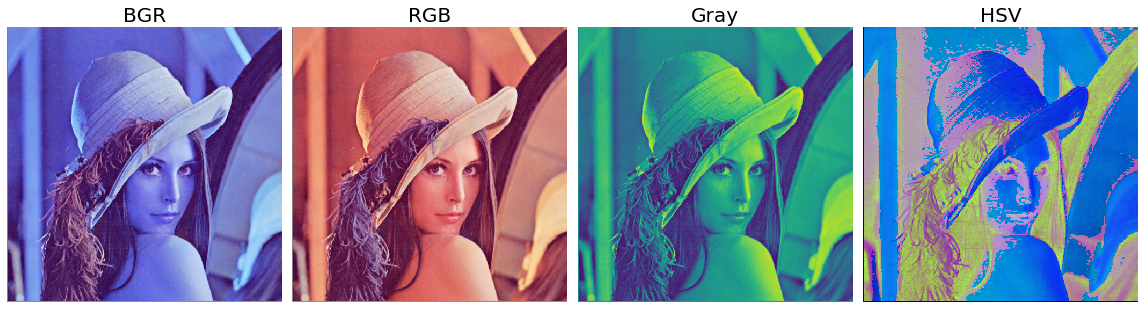

In [2]:
# 读取图片
lena = cv2.imread('fig/Lena.png')
# BGR转RGB
lena_RGB = cv2.cvtColor(lena,cv2.COLOR_BGR2RGB)
# BGR转GARY
lena_GRAY = cv2.cvtColor(lena,cv2.COLOR_BGR2GRAY)
# BGR转HSV
lena_HSV = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)


titles = ['BGR','RGB','Gray','HSV']
images = [lena,lena_RGB,lena_GRAY,lena_HSV]
plt.figure(figsize=(16,9))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i],fontsize=20)
    plt.axis('off')
plt.tight_layout()
plt.savefig('fig/color_cvt.png')

## 颜色转换器

In [5]:
def RGB2HSV(R,G,B):
    RGB = np.uint8([[[R,G,B]]])
    HSV = cv2.cvtColor(RGB,cv2.COLOR_RGB2HSV)
    return HSV[0][0]

## 颜色追踪

In [6]:
red_cup = cv2.imread('fig/red_cup.jpg')
hsv = cv2.cvtColor(red_cup,cv2.COLOR_BGR2HSV)
lower = RGB2HSV(95,27,28)
upper = RGB2HSV(180,45,55)
mask = cv2.inRange(hsv,lower, upper)
res = cv2.bitwise_and(red_cup,red_cup, mask= mask)
cv2.imshow('res',res)
cv2.waitKey(0)

-1

# 阈值转换

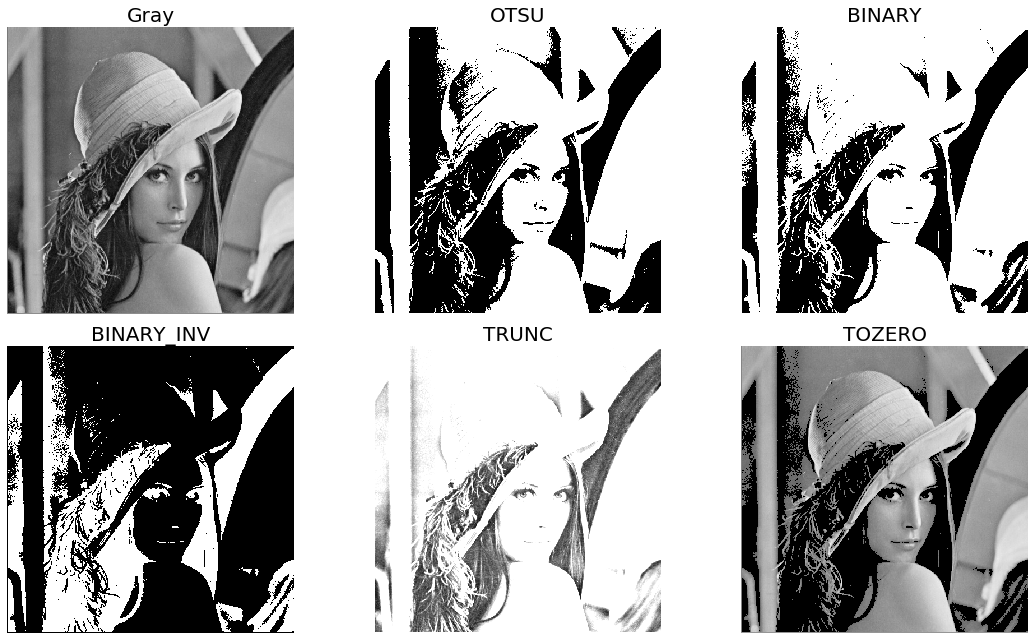

In [3]:
# 读取图片， 转成灰度
lena = cv2.imread('fig/Lena.png')
lena_GRAY = cv2.cvtColor(lena,cv2.COLOR_BGR2GRAY)

ret_1, lena_otsu = cv2.threshold(lena_GRAY,100,255,cv2.THRESH_OTSU)
ret_2, lena_binary = cv2.threshold(lena_GRAY,100,255,cv2.THRESH_BINARY)
ret_3, lena_binary_inv = cv2.threshold(lena_GRAY,100,255,cv2.THRESH_BINARY_INV)
ret_4, lena_trunc = cv2.threshold(lena_GRAY,100,255,cv2.THRESH_TRUNC)
ret_5, lena_tozero = cv2.threshold(lena_GRAY,100,255,cv2.THRESH_TOZERO)

titles = ['Gray','OTSU','BINARY','BINARY_INV','TRUNC','TOZERO']
images = [lena_GRAY, lena_otsu, lena_binary, lena_binary_inv, lena_trunc, lena_tozero]

plt.figure(figsize=(16,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i],fontsize=20)
    plt.axis('off')
plt.tight_layout()
plt.savefig('fig/gray.png')

# 形态学变换

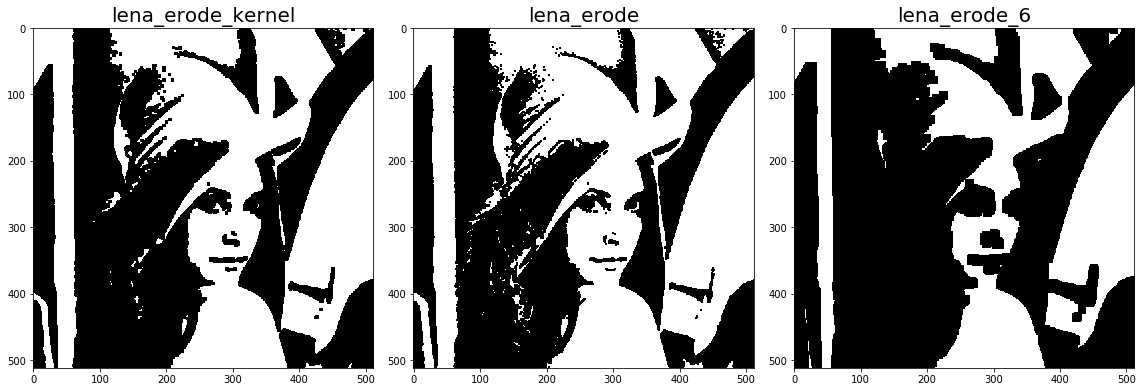

In [4]:
kernel = np.ones((5,5),np.uint8)
lena_erode_kernel = cv2.erode(lena_otsu,kernel,iterations = 1) 
lena_erode = cv2.erode(lena_otsu,None,iterations = 1) 
lena_erode_6 = cv2.erode(lena_otsu,None,iterations = 6) 

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(lena_erode_kernel,'gray')
plt.title('lena_erode_kernel',fontsize=20)
plt.subplot(1,3,2)
plt.imshow(lena_erode,'gray')
plt.title('lena_erode',fontsize=20)
plt.subplot(1,3,3)
plt.imshow(lena_erode_6,'gray')
plt.title('lena_erode_6',fontsize=20)

plt.tight_layout()
plt.savefig('fig/erode.png')

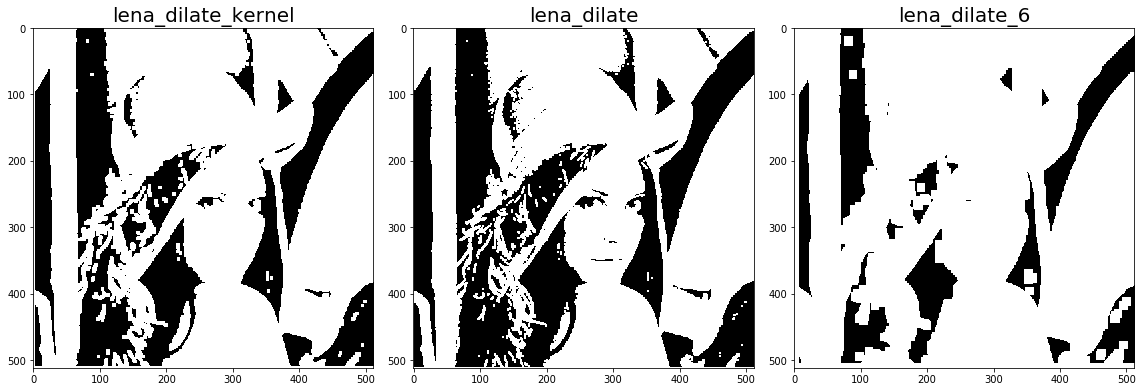

In [117]:
kernel = np.ones((5,5),np.uint8)
lena_dilate_kernel = cv2.dilate(lena_otsu,kernel,iterations = 1) 
lena_dilate = cv2.dilate(lena_otsu,None,iterations = 1) 
lena_dilate_6 = cv2.dilate(lena_otsu,None,iterations = 6) 

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(lena_dilate_kernel,'gray')
plt.title('lena_dilate_kernel',fontsize=20)
plt.subplot(1,3,2)
plt.imshow(lena_dilate,'gray')
plt.title('lena_dilate',fontsize=20)
plt.subplot(1,3,3)
plt.imshow(lena_dilate_6,'gray')
plt.title('lena_dilate_6',fontsize=20)

plt.tight_layout()
plt.savefig('fig/dilate.png')

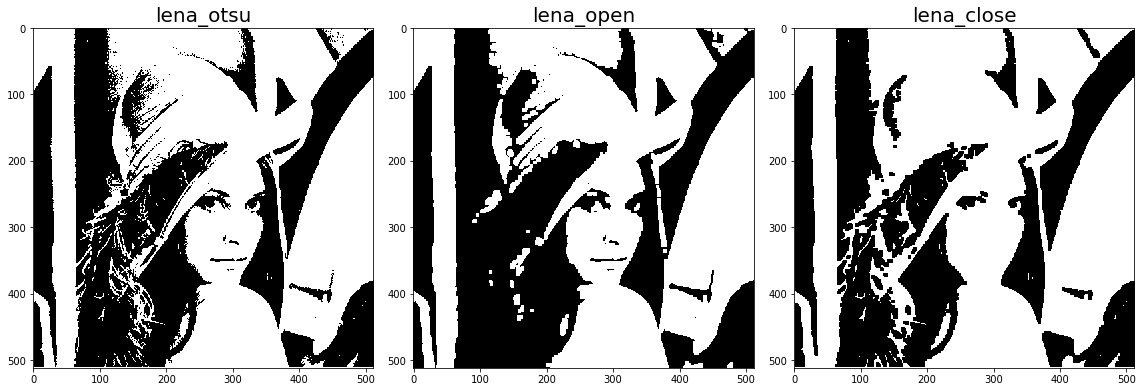

In [121]:
lena_open = cv2.morphologyEx(lena_otsu, cv2.MORPH_OPEN, kernel)
lena_close = cv2.morphologyEx(lena_otsu, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(lena_otsu,'gray')
plt.title('lena_otsu',fontsize=20)
plt.subplot(1,3,2)
plt.imshow(lena_open,'gray')
plt.title('lena_open',fontsize=20)
plt.subplot(1,3,3)
plt.imshow(lena_close,'gray')
plt.title('lena_close',fontsize=20)

plt.tight_layout()
plt.savefig('fig/open_close.png')

In [15]:
line_1 = lena_erode_6[400]
index = np.where(line_1 == 255)

In [18]:
index[0]

array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
       278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
       291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
       304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
       317, 318, 319, 320, 321, 382, 383, 384, 385, 386, 387, 388, 389,
       390, 391, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469], dtype=int64)

In [11]:
(1,)

(1,)